In [ ]:
import hashlib
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# load the dataset
df = pd.read_csv('/content/ecg_data_t.csv')
x_data = df['Time'][:200].values
y_data = df['DATA'][:200].values
print('Original Data\n',y_data)

Original Data
 [347 348 349 350 353 353 354 355 357 360 361 361 361 360 360 359 358 357
 354 350 348 350 351 349 347 347 349 350 351 352 350 351 352 350 350 351
 350 348 348 349 349 349 348 350 352 352 351 351 352 351 350 351 353 353
 353 353 354 354 354 355 354 355 355 354 353 353 352 352 353 354 353 354
 355 353 353 353 355 359 363 362 361 361 370 380 380 373 370 370 366 357
 351 350 352 353 351 350 352 353 352 350 350 351 352 354 353 353 350 345
 344 351 380 440 519 581 573 496 406 355 350 355 353 343 335 335 337 338
 338 339 340 340 341 339 340 342 342 343 343 341 341 342 341 343 346 347
 346 343 345 347 348 349 351 353 353 353 354 355 356 358 359 359 359 358
 357 357 357 355 352 349 348 348 348 348 344 344 346 346 346 346 347 348
 348 346 344 344 344 343 344 347 348 348 347 349 350 350 350 350 349 349
 349 347]


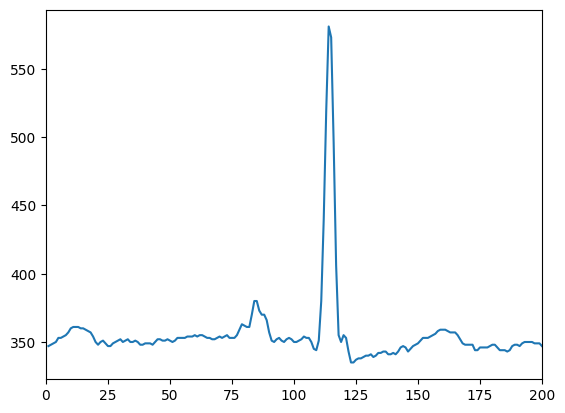

In [ ]:
# Normalize the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_data_normalized = scaler_x.fit_transform(x_data.reshape(-1,1))
y_data_normalized = scaler_y.fit_transform(y_data.reshape(-1, 1)).ravel()

plt.plot(x_data , y_data)
plt.xlim(0,200)
plt.show()

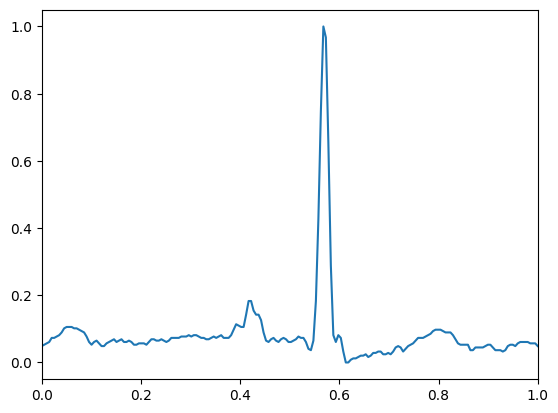

In [ ]:
plt.plot(x_data_normalized , y_data_normalized)
plt.xlim(0,1)
plt.show()

In [ ]:
import sympy as sp

def hermite_forward(x, n):
    if n == 1:
      return x + 2
    elif n == 2:
      return x**2 - x + 2
    elif n == 3:
      return x*3 - x*2 + 2
    elif n == 4:
      return x*4 - x*3 + 2
    elif n == 5:
      return x*5 - x*4 + 2
    elif n == 6:
      return x*6 - x*5 + 2
    else:
        print("Invalid value of n, must be between 1 and 6")

In [ ]:

def reverse_hermite(y, n):
    x = sp.Symbol('x')
    equation = None
    if n == 1:
        equation = x - (y - 2)
    elif n == 2:
        equation = x**2 - x - (y - 2)
    elif n == 3:
        equation = x*3 - x*2 - (y - 2)
    elif n == 4:
        equation = x*4 - x*3 - (y - 2)
    elif n == 5:
        equation = x*5 - x*4 - (y - 2)
    elif n == 6:
        equation = x*6 - x*5 - (y - 2)
    else:
        raise ValueError("Invalid value of n, must be between 1 and 6")

    solutions = sp.solve(equation, x)
    # Filter out any complex solutions
    real_solutions = [sol.evalf() for sol in solutions if sol.is_real]
    return real_solutions

In [ ]:

import random

FH_Data = []
RH_Data = []

def embed_algorithm(cover_block,n):
    stego_block = []
    i=0
    for yi in cover_block:
        yi = hermite_forward(yi,n)
        FH_Data.append(yi)
        b1 = random.randint(0,1)
        b2 = random.randint(0,1)
        Y1 = round(yi, 3)
        y1 = str(Y1)
        y1=y1[:4]
        Y2 = float(y1)
        Sn = np.sign(Y1)
        p = int((Y1 * 1e3) % 10)
        p1 = round(p / 2)
        p2 = p - p1 + 1

        if b1 == 0 and b2 == 0:
            yadd = 0.0
            yfix = p
        else:
            yadd = p2 * ((b1 * 10) + b2)
            yfix = p1

        tilde_yi = Sn * ((Y2) + (yfix * 1e-3) + (yadd * 1e-5))
        tilde_yi=reverse_hermite(tilde_yi,n)
        RH_Data.append(tilde_yi[0])
        stego_block.append(round(tilde_yi[0],5))
    for i in range(len(RH_Data)):
      RH_Data[i] = RH_Data[i] + 5 + n
    for i in range(len(FH_Data)):
      FH_Data[i] = FH_Data[i] + n
    return stego_block

In [ ]:
def generate_hash(data):
    hash_object = hashlib.sha256(str(data).encode())
    return hash_object.hexdigest()

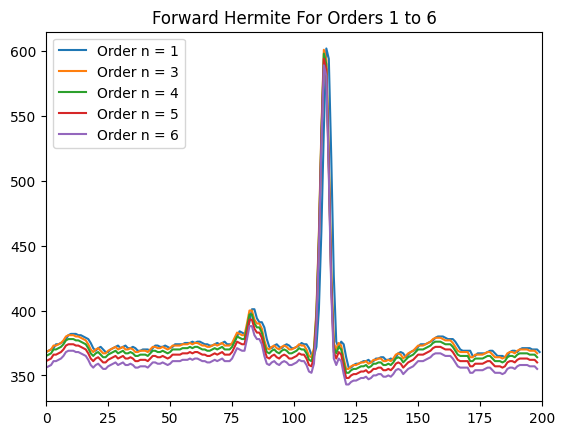

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cover_block = y_data
for n in range(1,7):
  if n != 2:
    ste = embed_algorithm(cover_block,n)


plt.plot(FH_Data[:200],label='Order n = 1')
plt.plot(FH_Data[201:400],label='Order n = 3')
plt.plot(FH_Data[401:600],label='Order n = 4')
plt.plot(FH_Data[601:800],label='Order n = 5')
plt.plot(FH_Data[801:1000],label='Order n = 6')
plt.title('Forward Hermite For Orders 1 to 6')


plt.legend(loc='upper left')
plt.xlim(0,200)
plt.show()

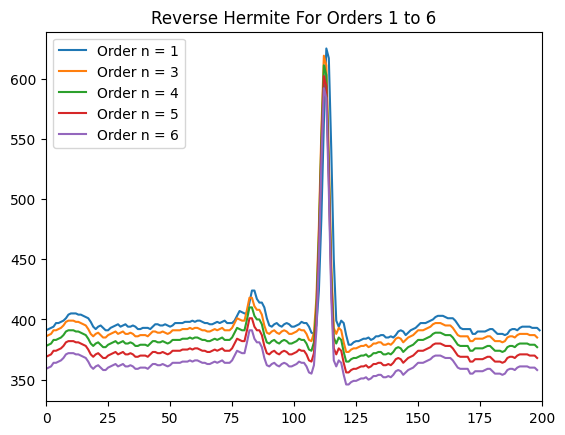

In [ ]:
plt.plot(RH_Data[:200],label='Order n = 1')
plt.plot(RH_Data[201:400],label='Order n = 3')
plt.plot(RH_Data[401:600],label='Order n = 4')
plt.plot(RH_Data[601:800],label='Order n = 5')
plt.plot(RH_Data[801:1000],label='Order n = 6')
plt.title('Reverse Hermite For Orders 1 to 6')

plt.legend(loc='upper left')
plt.xlim(0,200)
plt.show()

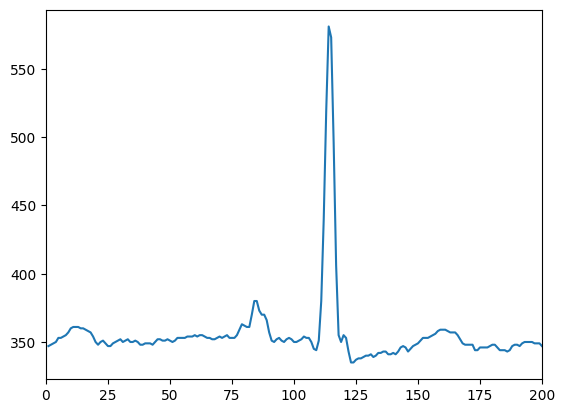

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x_data = np.arange(1,201)
y_data = ste
plt.plot(x_data , y_data)
plt.xlim(0,200)
plt.show()